In [1]:
import torch
import sklearn
import torch.nn as nn
import pandas as pd

from AtomMapping import AtomMapper

# device = torch.device('cuda:0')
device = torch.device('cpu')
mapper = AtomMapper(device)

In [2]:
# Examples from http://rxnmapper.ai/demo.html
rxn_dict = {
    'Thioether_synthesis': 'CC(C)S.CN(C)C=O.Fc1cccnc1F.O=C([O-])[O-].[K+].[K+]>>CC(C)Sc1ncccc1F',
    'Grignard_reaction': 'CCOCC.C[Mg+].O=Cc1ccc(F)cc1Cl.[Br-]>>CC(O)c1ccc(F)cc1Cl',
    'Morpholine_synthesis': 'BrCCOCCBr.CCN(C(C)C)C(C)C.CCOC(C)=O.CN(C)C=O.Cl.NCC(F)(F)CO>>OCC(F)(F)CN1CCOCC1',
    'Diels_Alder': 'C1=CCC=C1.O=C1C=CC(=O)C1>>O=C1CC(=O)C2C3C=CC(C3)C12',
    'Claisen_Rearrangement': 'OC1C=CC=CC=1C(C=C)(C)C>>C1=CC=C(OCC=C(C)C)C=C1',
       }

Mapped reaction:
[CH3:1][CH:2]([CH3:3])[SH:4].CN(C)C=O.[F:11][c:10]1[cH:9][cH:8][cH:7][n:6][c:5]1F.O=C([O-])[O-].[K+].[K+]>>[CH3:1][CH:2]([CH3:3])[S:4][c:5]1[n:6][cH:7][cH:8][cH:9][c:10]1[F:11] 

Is confident prediction?
False 

Prediction heatmap:


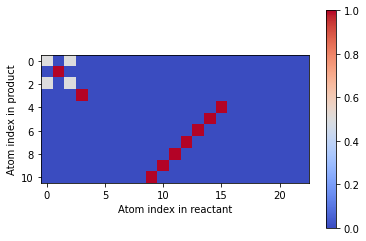

In [3]:
return_confidence = True
reaction_type = 'Thioether_synthesis'

rxn = rxn_dict[reaction_type]
prediction = mapper.get_atom_map(rxn, return_confidence=return_confidence)
mapped_rxn = prediction['mapped_rxn']
print ('Mapped reaction:')
print (mapped_rxn, '\n')
if return_confidence:
    confidence = prediction['confidence']
    print ('Is confident prediction?')
    print (confidence, '\n')

print ('Prediction heatmap:')
result = prediction['mapper']
result.plot_prediction()

In [4]:
result.map_steps

,4,6,2,7,5,10,9,8,11,1,3
product_idx,3,5,1,6,4,9,8,7,10,0,2
reactant_idx,3,14,1,13,15,10,11,12,9,0,2
score,1.0,1.0,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.247,0.99


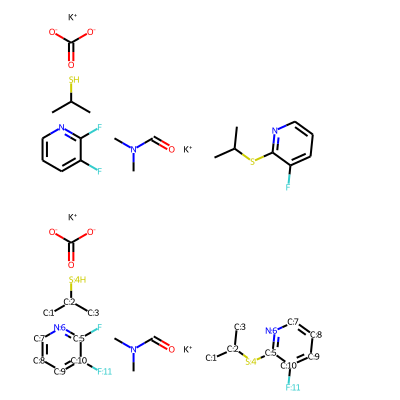

In [5]:
from rdkit import Chem
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in rxn.split('>>')+mapped_rxn.split('>>')],  molsPerRow=2)